In [1]:
# importing all the functions 
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string
import matplotlib.pyplot as plt

In [7]:
#stop_word  all are taken from the internet

stop_words=["a","the","able","about","data", "about", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "a","former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]

In [65]:
#X is a list where first element is name of document and second is the text in documents.
#Y is the category
X  =[] 
Y = []
for category in os.listdir("20_newsgroups"):
    for document in os.listdir("20_newsgroups/"+category):
        with open("20_newsgroups/"+category +'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)
            
            


In [64]:
print(len("20_newsgroups"))
print(len("20_newsgroups/"+category))
print(len("20_newsgroups/"+category +'/'+document))

13
32
38


In [66]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#no of categories
print(len(set(Y)))
#Describing the text of document.
print(X[0][0])
print(X[0][1])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
20
51060
Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51060 alt.atheism.moderated:727 news.answers:7300 alt.answers:155
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!agate!netsys!ibmpcug!mantis!mathew
From: mathew <mathew@mantis.co.uk>
Newsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers
Subject: Alt.Atheism FAQ: Introduction to Atheism
Summary: Please read this file before posting to alt.atheism
Keywords: FAQ, atheism
Message-ID: <19930405122245@mantis.co.uk>
Date: Mon, 5 Apr 1993 12:22:45 GMT
Expires: Thu, 6 May 1993 12:22:45 GMT
Followup-To: alt.atheism
Distribution: world
Organization: Mantis Consultants, Cambridge. UK.
Approved: news-answers-request@mit.edu
Supersedes: <19930308134439@mantis.co.uk>
Lines: 646

Archive-name: atheism/introduction
Alt-atheism-archive-name: introduction
Last-modified: 5 April 1993
Version: 1

In [12]:
#splitting training and testing data
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [13]:
#splitting 
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

14997
5000
14997
5000


In [15]:
#making dictionary of word with corrosponding frequencies
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)  #re.split function is used to split every word from the text...
    #Iterating over each word
    for s in stripped:
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'path': 15289,
 'cantaloupe': 19527,
 'srv': 24306,
 'cmu': 39326,
 'edu': 122977,
 'rochester': 3646,
 'cornell': 870,
 'batcomputer': 413,
 'caen': 887,
 'usenet': 6251,
 'cis': 4326,
 'ufl': 575,
 'gatech': 3241,
 'howland': 8255,
 'reston': 8221,
 'ans': 8337,
 'net': 19050,
 'bogus': 1049,
 'sura': 2765,
 'wintermute': 12,
 'phys': 57,
 'psu': 419,
 'news': 25737,
 'stimpy': 26,
 'dev': 140,
 'null': 233,
 'gregory': 90,
 'nagy': 7,
 'newsgroups': 15314,
 'rec': 4881,
 'sport': 1812,
 'hockey': 1452,
 'subject': 16222,
 'espn': 246,
 'date': 15591,
 'apr': 15425,
 'organization': 14919,
 'penn': 75,
 'state': 14087,
 'laboratory': 404,
 'for': 37874,
 'elementary': 29,
 'steam': 37,
 'physics': 628,
 'lines': 15671,
 'message': 16467,
 'references': 9733,
 'udel': 3251,
 'nntp': 7052,
 'posting': 7313,
 'host': 6725,
 'article': 10142,
 'tmavor': 6,
 'earthview': 6,
 'cms': 55,
 'writes': 11028,
 'various': 579,
 'justifiable': 37,
 'rantings': 5,
 'coverage': 364,
 'deleted': 55

In [16]:
# Sorting the dictionary on basis of frequency of words 
# descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 122977),
 ('cmu', 39326),
 ('com', 37926),
 ('for', 37874),
 ('news', 25737),
 ('srv', 24306),
 ('are', 24217),
 ('cantaloupe', 19527),
 ('net', 19050),
 ('but', 17366),
 ('message', 16467),
 ('subject', 16222),
 ('lines', 15671),
 ('date', 15591),
 ('apr', 15425),
 ('newsgroups', 15314),
 ('path', 15289),
 ('can', 15004),
 ('organization', 14919),
 ('state', 14087),
 ('gmt', 13376),
 ('ohio', 11882),
 ('writes', 11028),
 ('article', 10142),
 ('comp', 9825),
 ('references', 9733),
 ('talk', 9249),
 ('misc', 8848),
 ('ans', 8337),
 ('sender', 8273),
 ('howland', 8255),
 ('reston', 8221),
 ('don', 8006),
 ('like', 7727),
 ('people', 7671),
 ('university', 7480),
 ('just', 7468),
 ('posting', 7313),
 ('nntp', 7052),
 ('know', 6908),
 ('mps', 6899),
 ('host', 6725),
 ('sci', 6536),
 ('think', 6281),
 ('usenet', 6251),
 ('zaphod', 6241),
 ('been', 6116),
 ('politics', 5919),
 ('alt', 5866),
 ('windows', 5749),
 ('does', 5360),
 ('use', 5346),
 ('time', 5273),
 ('rutgers', 5207),
 (

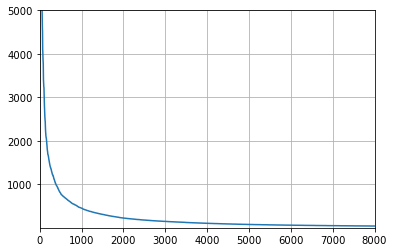

In [17]:
#plotting graph(words vs freq)
#further deciding number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [18]:
#taking top 2000 word with maximum frequencies in 1 variable
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'for',
 'news',
 'srv',
 'are',
 'cantaloupe',
 'net',
 'but',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'ohio',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'like',
 'people',
 'university',
 'just',
 'posting',
 'nntp',
 'know',
 'mps',
 'host',
 'sci',
 'think',
 'usenet',
 'zaphod',
 'been',
 'politics',
 'alt',
 'windows',
 'does',
 'use',
 'time',
 'rutgers',
 'eng',
 'near',
 'harvard',
 'new',
 'rec',
 'good',
 'max',
 'crabapple',
 'sei',
 'could',
 'noc',
 'soc',
 'xref',
 'das',
 'because',
 'cis',
 'even',
 'europa',
 'ece',
 'gtefsd',
 'world',
 'uunet',
 'way',
 'org',
 'religion',
 'make',
 'say',
 'gov',
 'god',
 'christian',
 'first',
 'right',
 'rochester',
 'distribution',
 'did',
 'club',
 'andrew',
 'mail',
 'want',
 'space',
 'ibm',
 'magnesium',
 'udel',
 'reply',
 'utexas',
 'gatech',
 'used'

In [19]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length 
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [20]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [21]:
# printing the data of x_test_dataset
print(x_test_dataset)

[[10  3  1 ...  0  0  0]
 [ 9  2  1 ...  0  0  0]
 [ 2  2  5 ...  0  0  0]
 ...
 [ 5  1  0 ...  0  0  0]
 [ 6  4  0 ...  0  0  0]
 [ 5  1  5 ...  0  0  0]]


In [22]:
#printing xtrain and xtest dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)
print(x_train_dataset.shape)
print(x_test_dataset.shape)

[[12  1  0 ...  0  0  0]
 [ 8  1  2 ...  0  0  0]
 [ 8  1  0 ...  0  0  0]
 ...
 [12  1  2 ...  0  0  0]
 [12  2  0 ...  0  0  0]
 [ 8  3  0 ...  0  0  0]]
--------------------------
[[10  3  1 ...  0  0  0]
 [ 9  2  1 ...  0  0  0]
 [ 2  2  5 ...  0  0  0]
 ...
 [ 5  1  0 ...  0  0  0]
 [ 6  4  0 ...  0  0  0]
 [ 5  1  5 ...  0  0  0]]
(14997, 2000)
(5000, 2000)


In [23]:
#Test Classification using Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on training data: 0.8935787157431486
Score on testing data: 0.862
[[214   0   0   0   0   0   0   1   2   1   0   1   0   0   1   0   0   0
    0  37]
 [  0 179   7  13  11   4   3   1   2   1   0   0   1   0   3   0   0   0
    0   0]
 [  0   2 201  26   3  15   5   1   0   0   0   0   2   1   0   0   0   0
    0   0]
 [  0   3   2 196  42   1   3   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   0   0  14 196   1   9   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  17  12   9   7 221   3   0   2   0   0   1   3   0   0   0   0   0
    0   0]
 [  0   0   1   2   3   0 252   3   1   0   0   0   6   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   2 242   5   1   1   0   4   0   0   0   0   0
    1   0]
 [  0   0   0   0   0   0   5   6 237   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   3   4 230   9   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   1   1   1   3  16 223   0   0   0   1   0   0   0
    

In [25]:
# Implementation of Naive Bayes 

def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

In [26]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [27]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [28]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [29]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [30]:
#This cell is gonna take forever to execute
dictionary=fit(x_train_dataset,y_train)

In [31]:
#predicting for training and testing data
y_pred_training=predict_(x_train_dataset,dictionary)
y_pred_testing=predict_(x_test_dataset,dictionary)

In [32]:
s1=score(y_train,y_pred_training)
s2=score(y_test,y_pred_testing)
s1,s2

(0.9068480362739214, 0.8768)

In [33]:
print(confusion_matrix(y_test,y_pred_testing))
print(classification_report(y_test,y_pred_testing))

[[216   1   0   1   0   0   0   2   0   1   0   1   1   1   0   0   0   0
    1  32]
 [  1 182   4  15  10   2   3   0   0   1   0   1   4   1   1   0   0   0
    0   0]
 [  0  13 179  36   5  15   4   0   0   0   0   1   3   0   0   0   0   0
    0   0]
 [  0   6   1 204  33   0   3   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   1   0  10 202   0   4   0   0   0   0   0   1   2   0   0   0   0
    0   0]
 [  0  21   9   7   5 227   2   1   1   0   0   1   1   0   0   0   0   0
    0   0]
 [  0   0   0   4   1   0 254   5   0   0   0   0   4   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   4 242   3   0   0   0   5   0   0   0   1   0
    1   0]
 [  0   0   0   0   0   0   2   6 243   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   0 241   6   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   2   7 236   0   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   1   0   0   0   0 237  11   0   1   0

In [34]:
# comparisn of scores
print("score of inbuit classifier:")
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print("-----------------")
print("score of self implementation: ")
s1=score(y_train,y_pred_training)
s2=score(y_test,y_pred_testing)
print("Score on training data:",s1)
print("Score on testing data:",s2)

score of inbuit classifier:
Score on training data: 0.8935787157431486
Score on testing data: 0.862
-----------------
score of self implementation: 
Score on training data: 0.9068480362739214
Score on testing data: 0.8768
